Polynomial Regression

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("Position_Salaries.csv")

In [35]:
X = df[["Level"]]
y = df[["Salary"]]

In [6]:
# since we're not using the position column, no need to encode

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [97]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["Position"])], remainder='passthrough')

In [10]:
X = ct.fit_transform(X)

NameError: name 'ct' is not defined

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures(degree=4)

In [37]:
X = poly.fit_transform(X)

In [20]:
# since it's a small dataset and he had a very specific problem spec, we do not split it
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

In [38]:
y_pred = LinearRegression().fit(X, y).predict(X)

In [39]:
y_pred

array([[ 53356.64335675],
       [ 31759.90675984],
       [ 58642.1911421 ],
       [ 94632.86713282],
       [121724.94172495],
       [143275.05827509],
       [184003.49650352],
       [289994.17249417],
       [528694.63869462],
       [988916.08391613]])

In [40]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


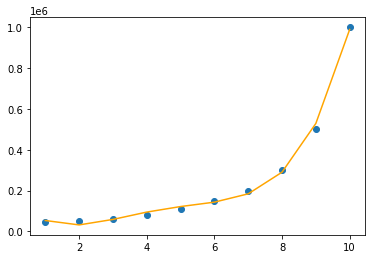

In [41]:
plt.scatter(df["Level"], y)
plt.plot(df["Level"], LinearRegression().fit(X, y).predict(X), 'orange')
plt.show()

# ohhh so it makes sense, having that extra feature made up for the 2nd degree polynomial and didn't require 3rd
# or maybe not

In [1]:
# maybe the position thing has nothing to do with predictions?indeed alondoponto said it's redundant to have both

In [82]:
X = [[x] for x in df["Level"]]

In [12]:
X

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [42]:
# predicting a singular value. PS: the code below I had already figured out

LinearRegression().fit(X, y).predict(poly.fit_transform([[6.5]]))

array([[158862.45265155]])